<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch5_InferentialStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Data from Collective Bargaining Survey

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainnumeric.xlsx')

Import Data from CRM database

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/CRMclean.xlsx', sheet_name="Sheet1")

#Compare to a Value

## Chi-Square Goodness of Fit Test

Is there a difference in categories?

In [ ]:
from scipy.stats import chisquare

In [ ]:
df2_obs = df2.value_counts("Q23")

In [ ]:
chisquare(df2_obs)

Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.7165313105737892)

Compare to percentages that are not equal

In [ ]:
import numpy as np
from scipy.stats import chisquare

In [ ]:
df2_obs = df2.value_counts("Q23")

In [ ]:
df2_tot = len(df2["Q23"])
df2_exp = np.array([0.25, 0.5, 0.25]) * df2_tot

In [ ]:
chisquare(df2_obs, df2_exp)

Power_divergenceResult(statistic=6.523809523809524, pvalue=0.03831534685404659)

## Wilcoxen One Sample

In [ ]:
import numpy as np
from scipy.stats import wilcoxon

In [ ]:
df2_len = len(df2["Q18"])
df2_18_med = np.repeat(a=4, repeats=df2_len)

In [ ]:
wilcoxon(df2["Q18"],df2_18_med)

WilcoxonResult(statistic=12.5, pvalue=4.955049741706286e-07)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

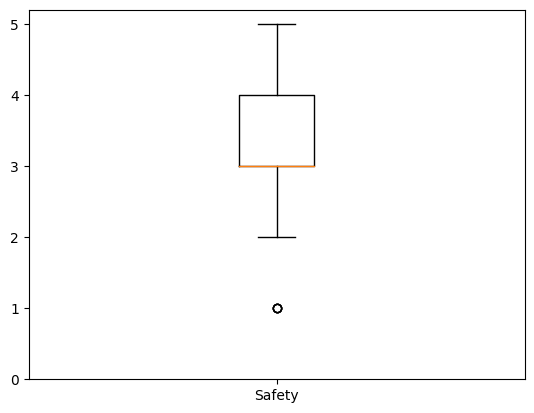

In [ ]:
plt.boxplot(df2["Q18"])
plt.xticks([1],["Safety"])
plt.yticks(np.arange(0, 6, step=1))
plt.show()

## One Sample T-Test

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest_1samp(df2.dropna()["Q24"], popmean=5, alternative="less")

TtestResult(statistic=4.4145219034733065, pvalue=0.9999625957076766, df=40)

In [ ]:
df2["Q24"].std()

8.435589786118191

<function matplotlib.pyplot.show(close=None, block=None)>

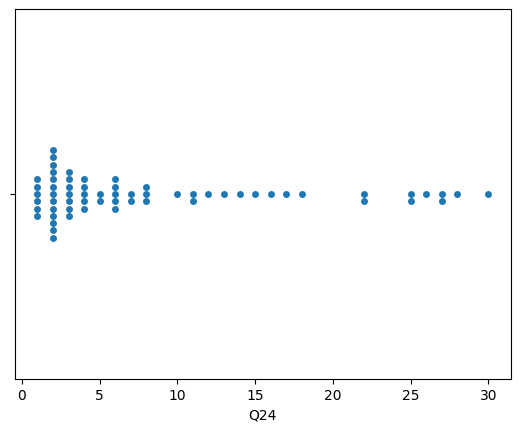

In [ ]:
from seaborn import swarmplot
swarmplot(data=df2, x="Q24")
plt.show

# Difference Between 2 Groups (Different people in each group)

## Fisher's Test

In [ ]:
from scipy.stats import fisher_exact
import numpy as np

In [ ]:
fe = np.array([[19, 16], [7, 6]])

In [ ]:
fisher_exact(fe, alternative="two-sided")

SignificanceResult(statistic=1.0178571428571428, pvalue=1.0)

If counts are not known

In [ ]:
from scipy.stats import fisher_exact
from pandas import crosstab

In [ ]:
df2_Q5 = df2[df2['Q5'] != 3]

In [ ]:
df2_fe = crosstab(index=df2_Q5['Q2'], columns= df2_Q5["Q5"])

In [ ]:
fisher_exact(df2_fe, alternative='two-sided')

SignificanceResult(statistic=1.0178571428571428, pvalue=1.0)

## Mann Whitney

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
df2_Q22a = df2[df2['Q22'] == 1]
df2_Q22b = df2[df2['Q22'] == 3]

In [ ]:
mannwhitneyu(df2_Q22a["Q20"], df2_Q22b["Q20"] )

MannwhitneyuResult(statistic=89.5, pvalue=0.01948437893613025)

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
df2_Q22a = df2[df2['Q22'] == 2]
df2_Q22b = df2[df2['Q22'] == 3]

In [ ]:
mannwhitneyu(df2_Q22a["Q20"], df2_Q22b["Q20"], alternative="greater" )

MannwhitneyuResult(statistic=243.0, pvalue=0.0005920457477458231)

## Two Sample T Test

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df2_Q4c =df2[df2['Q4a'] == 1]
df2_Q4d =df2[df2['Q4a'] == 6]

In [ ]:
ttest_ind(df2_Q4c["Q24"], df2_Q4d["Q24"])

TtestResult(statistic=-1.8547357796741686, pvalue=0.07382758670358969, df=29.0)

# Difference Between 2 Groups (Same people in each group)

## McNemar's Test

In [ ]:
port numpy as np
mn=df3.copy()
mn["Q6"].replace({"Qualified": 1, "Contimacted" : 1, "Demo" :  2, "Proposal" : 2, "Negotiations": 2, "Won" : 2, "Lost" : np.nan}, inplace=True)
mn["Q16"].replace({"Qualified": 1, "Contacted" : 1, "Demo" :  2, "Proposal" : 2, "Negotiations": 2, "Won" : 2, "Lost" : np.nan}, inplace=True)

In [ ]:
from pandas import crosstab
mn_cross = crosstab(index=mn['Q6'], columns= mn["Q16"])
mn_cross

Q16,1.0,2.0
Q6,,
1,64,17
2,0,50


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(mn_cross, exact=True, correction=True))

pvalue      1.52587890625e-05
statistic   0.0


## Wilcoxen Rank Sum Test

In [ ]:
import numpy as np
wn=df3.copy()
wn["Q16"].replace({"Qualified": 1, "Contacted" : 2, "Demo" :  3, "Proposal" : 4, "Negotiations": 5, "Won" : 6, "Lost" : np.nan}, inplace=True)
wn["Q26"].replace({"Qualified": 1, "Contacted" : 2, "Demo" :  3, "Proposal" : 4, "Negotiations": 5, "Won" : 6, "Lost" : np.nan}, inplace=True)

In [ ]:
wn2 = wn[["Q16", "Q26"]].dropna()

In [ ]:
from scipy.stats import wilcoxon
wilcoxon(wn2["Q16"], wn2["Q26"])

WilcoxonResult(statistic=28.0, pvalue=8.900637178256782e-13)

## Paired T Test

In [ ]:
import numpy as np
from scipy.stats import ttest_rel

In [ ]:
pairt = df3[["Q7", "Q17"]].dropna()

In [ ]:
ttest_rel(pairt["Q7"], pairt["Q17"])

TtestResult(statistic=-3.366788583661257, pvalue=0.0010153763317243697, df=123)

In [ ]:
ttest_rel(pairt["Q7"], pairt["Q17"], alternative="less")

TtestResult(statistic=-3.366788583661257, pvalue=0.0005076881658621848, df=123)

# Difference Between 3 or More Groups (Different People in each group)

## Chi Square Test of Independence

In [ ]:
from scipy.stats import chi2_contingency
from pandas import crosstab

In [ ]:
df2_chi = crosstab(index=df2['Q7'], columns= df2["Q23"])

In [ ]:
chi2_contingency(df2_chi)

Chi2ContingencyResult(statistic=6.430731225296443, pvalue=0.16920753763799504, dof=4, expected_freq=array([[ 5.71428571,  6.98412698,  7.3015873 ],
       [12.        , 14.66666667, 15.33333333],
       [ 0.28571429,  0.34920635,  0.36507937]]))

## Kruskal Wallis

In [ ]:
from scipy.stats import kruskal

In [ ]:
df2_Q23a = df2[df2['Q23'] == 1]
df2_Q23b = df2[df2['Q23'] == 2]
df2_Q23c = df2[df2['Q23'] == 3]

In [ ]:
kruskal(df2_Q23a["Q20"], df2_Q23b["Q20"], df2_Q23c["Q20"])

KruskalResult(statistic=13.322975375655746, pvalue=0.0012792418415467125)

Dunn Post Hoc Test if Kruskal Wallis finds a difference

Determine which of the 3+ categories are different.

In [ ]:
!pip install scikit-posthocs

In [ ]:
from scikit_posthocs import posthoc_dunn

In [ ]:
d_data = [df2_Q23a["Q20"], df2_Q23b["Q20"], df2_Q23c["Q20"]]

posthoc_dunn(d_data, p_adjust = 'holm')

,1,2,3
1,1.000000,0.001991,0.426205
2,0.001991,1.000000,0.010598
3,0.426205,0.010598,1.000000


In [ ]:
from pandas import crosstab
import matplotlib.pyplot as plt

In [ ]:
bar_23 = crosstab(index=df2['Q23'], columns= df2["Q20"], normalize="index")
print(bar_23)

Q20         1         2         3         4         5
Q23                                                  
1    0.000000  0.055556  0.333333  0.555556  0.055556
2    0.090909  0.318182  0.454545  0.136364  0.000000
3    0.000000  0.173913  0.304348  0.478261  0.043478


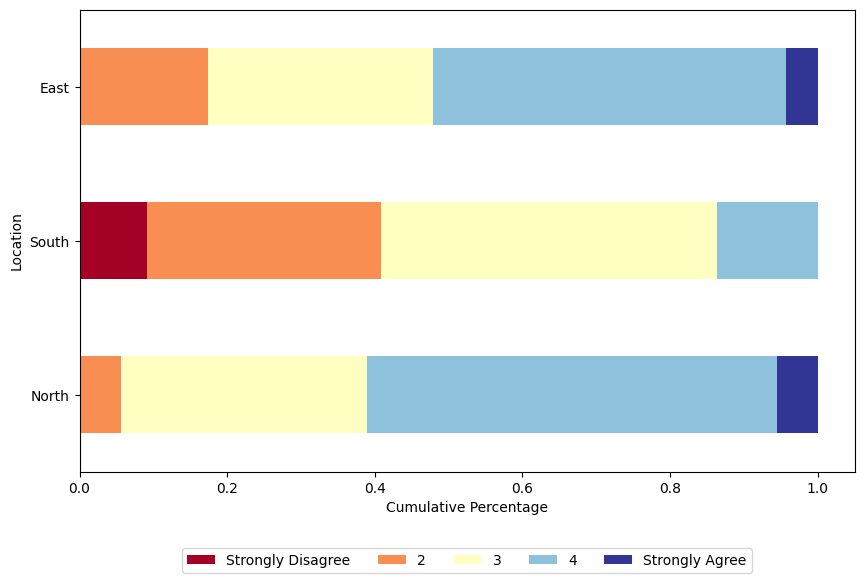

In [ ]:
bar_23.plot(kind='barh', stacked=True, colormap='RdYlBu', figsize=(10, 6))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("Location")
plt.xlabel("Cumulative Percentage")
plt.yticks([0, 1, 2], ["North", "South", "East"])
plt.legend(["Strongly Disagree", "2", "3", "4", "Strongly Agree"],
	loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()

## One Way ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
df2_Q23a = df2[df2['Q23'] == 1]
df2_Q23b = df2[df2['Q23'] == 2]
df2_Q23c = df2[df2['Q23'] == 3]

In [ ]:
f_oneway(df2_Q23a.dropna()["Q17"], df2_Q23b.dropna()["Q17"], df2_Q23c.dropna()["Q17"])

F_onewayResult(statistic=0.8125049434542468, pvalue=0.45130489865061807)

Tukey Test if ANOVA finds a difference

In [ ]:
from scipy.stats import tukey_hsd

In [ ]:
res = tukey_hsd(df2_Q23a.dropna()["Q17"], df2_Q23b.dropna()["Q17"], df2_Q23c.dropna()["Q17"])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.131     0.998    -5.388     5.127
 (0 - 2)     -2.244     0.570    -7.622     3.133
 (1 - 0)      0.131     0.998    -5.127     5.388
 (1 - 2)     -2.114     0.495    -6.632     2.404
 (2 - 0)      2.244     0.570    -3.133     7.622
 (2 - 1)      2.114     0.495    -2.404     6.632



In [ ]:
from scipy.stats import f_oneway

In [ ]:
df3_Q1a = df3[df3['Q1'] == "Taylor"]
df3_Q1b = df3[df3['Q1'] == "Smith"]
df3_Q1c = df3[df3['Q1'] == "Zhao"]

In [ ]:
f_oneway(df3_Q1a["Q8"], df3_Q1b["Q8"], df3_Q1c["Q8"])

F_onewayResult(statistic=31.272115366326013, pvalue=4.065465921865402e-10)

In [ ]:
from scipy.stats import tukey_hsd

In [ ]:
res = tukey_hsd(df3_Q1a["Q8"], df3_Q1b["Q8"], df3_Q1c["Q8"])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      1.134     0.364    -0.856     3.125
 (0 - 2)      5.684     0.000     3.809     7.559
 (1 - 0)     -1.134     0.364    -3.125     0.856
 (1 - 2)      4.550     0.000     2.702     6.398
 (2 - 0)     -5.684     0.000    -7.559    -3.809
 (2 - 1)     -4.550     0.000    -6.398    -2.702



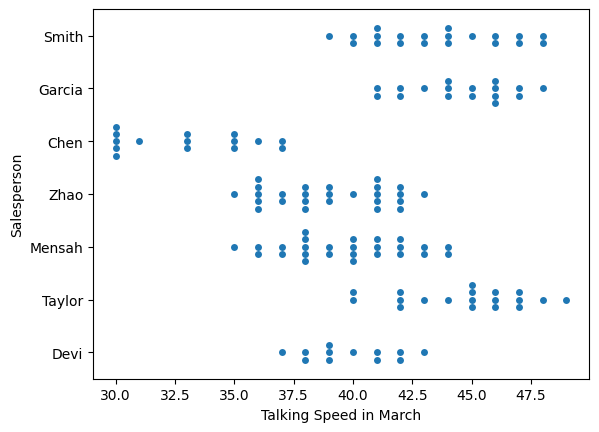

In [ ]:
from seaborn import swarmplot
import matplotlib.pyplot as plt
swarmplot(data=df3, x="Q8", y="Q1")
plt.xlabel('Talking Speed in March')
plt.ylabel('Salesperson')
plt.show()

# Difference Between 3 or More Groups (Same People in each group)

## Cochrane Q

In [ ]:
import numpy as np
cq=df3.copy()
cq["Q14"].replace({"Email": 1, "In Person" : 2, "Text" :  2, "Phone" : 2,  "No Follow Up" : np.nan}, inplace=True)
cq["Q24"].replace({"Email": 1, "In Person" : 2, "Text" :  2, "Phone" : 2,  "No Follow Up" : np.nan}, inplace=True)
cq["Q34"].replace({"Email": 1, "In Person" : 2, "Text" :  2, "Phone" : 2,  "No Follow Up" : np.nan}, inplace=True)

In [ ]:
from pandas import crosstab
mn_cross = crosstab(index=cq['Q14'], columns=[cq["Q24"], cq["Q34"]])
mn_cross


Q24 1.0     2.0    
Q34 1.0 2.0 1.0 2.0
Q14                
1.0  28   5   3   7
2.0   5   9   5  62

In [ ]:
from statsmodels.stats.contingency_tables import cochrans_q
print(cochrans_q(mn_cross))

df          1
pvalue      0.31731050786291115
statistic   1.0


In [ ]:
from pandas import crosstab
mn_cross = crosstab(index=cq['Q14'], columns=[cq["Q34"]])
mn_cross


Q34,1.0,2.0
Q14,,
1.0,31,12
2.0,10,71


In [ ]:
from pandas import crosstab
mn_cross = crosstab(index=cq['Q14'], columns=[cq["Q24"]])
mn_cross


Q24,1.0,2.0
Q14,,
1.0,34,10
2.0,14,68


In [ ]:
from pandas import crosstab
mn_cross = crosstab(index=cq['Q24'], columns=[cq["Q34"]])
mn_cross

Q34,1.0,2.0
Q24,,
1.0,33,14
2.0,8,69


## Friedman Test

In [ ]:
from scipy.stats import friedmanchisquare

In [ ]:
ft = df3[["Q11", "Q21", "Q31"]].dropna()

In [ ]:
friedmanchisquare(ft["Q11"], ft["Q21"], ft["Q31"])

FriedmanchisquareResult(statistic=7.857519788918052, pvalue=0.0196680478911155)

In [ ]:
df3_lenQ11 = np.repeat(a=1, repeats=len(df3["Q11"]))
df3_lenQ21 = np.repeat(a=2, repeats=len(df3["Q21"]))
df3_lenQ31 = np.repeat(a=3, repeats=len(df3["Q31"]))

In [ ]:
vp = pd.DataFrame({"Month": df3_lenQ11, "Interactivity":  df3["Q11"]})
vp2 = pd.DataFrame({"Month": df3_lenQ21, "Interactivity":  df3["Q21"]})
vp3 = pd.DataFrame({"Month": df3_lenQ31, "Interactivity":  df3["Q31"]})

In [ ]:
vp123 = pd.concat([vp, vp2, vp3])

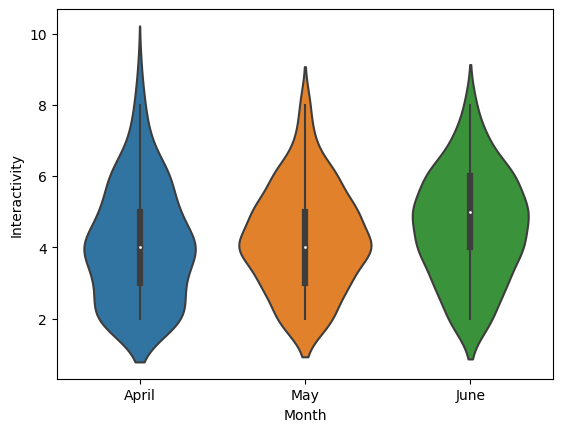

In [ ]:
from seaborn import violinplot
violinplot(data=vp123, x="Month", y="Interactivity")
plt.xlabel('Month')
plt.xticks([0, 1, 2],["April", "May", "June"])
plt.show()

## Repeated Measure ANOVA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM

In [ ]:
df3b = df3[["Q10", "Q20", "Q30"]].dropna()

In [ ]:
df3b_lenQ10 = np.repeat(a=1, repeats=len(df3b["Q10"]))
df3b_lenQ20 = np.repeat(a=2, repeats=len(df3b["Q20"]))
df3b_lenQ30 = np.repeat(a=3, repeats=len(df3b["Q30"]))

In [ ]:
arm = pd.DataFrame({"Month": df3b_lenQ10, "Monologue":  df3b["Q10"]})
arm.reset_index(inplace=True)

arm2 = pd.DataFrame({"Month": df3b_lenQ20, "Monologue":  df3b["Q20"]})
arm2.reset_index(inplace=True)

arm3 = pd.DataFrame({"Month": df3b_lenQ30, "Monologue":  df3b["Q30"]})
arm3.reset_index(inplace=True)

In [ ]:
arm123 = pd.concat([arm, arm2, arm3])

In [ ]:
print(AnovaRM(data=arm123, depvar="Monologue", subject='index', within=['Month']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Cat  1.1313 2.0000 246.0000 0.3243



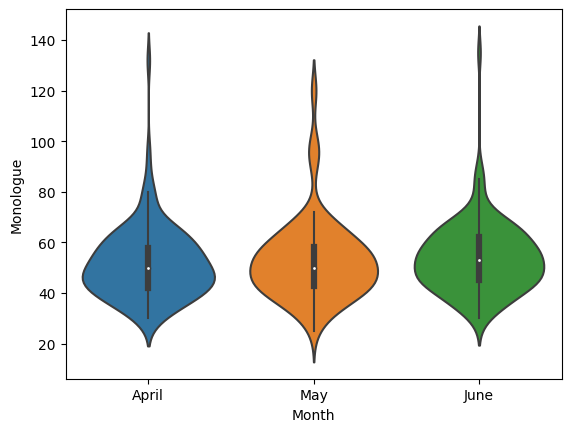

In [ ]:
from seaborn import violinplot
violinplot(data=arm123, x="Month", y="Monologue")
plt.xlabel('Month')
plt.xticks([0, 1, 2],["April", "May", "June"])
plt.show()

# Association

## Spearman Rank Correlation Test

In [ ]:
from scipy.stats import spearmanr

In [ ]:
spearmanr(df2["Q12"], df2["Q15"])

SignificanceResult(statistic=0.27643348147297453, pvalue=0.028299134325768437)

## Pearson Correlation Test

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(df2.dropna()["Q24"], df2.dropna()["Q17"])

PearsonRResult(statistic=0.3940689893927835, pvalue=0.010793010507816796)

# Prediction

Logistic Regression

Nonparametric Regression

Linear Regression

Multivariate Logistic Regression

Multivariate Regression